# Spectral Estimation of Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Parametric Methods

### Motivation

Non-parametric methods for the estimation of the power spectral density (PSD), like the [periodogram](periodogram.ipynb) or [Welch's method](welch_method.ipynb), don't rely on a-priori information about the process generating the random signal. Often some a-priori information is available that can be used to formulate a parametric model of the random process. The goal is then to estimate these parameters in order to characterize the random signal. Such techniques are known as *[parametric methods](https://en.wikipedia.org/wiki/Spectral_density_estimation#Parametric_estimation)* or *model-based methods*. The incorporation of a-priori knowledge can improve the estimation of the PSD significantly, as long as the underlying model is a valid description of the random process. The parametric model of the random process can also be used to generate random signals with a desired PSD.

### Process Models

For the remainder we assume wide-sense stationary real-valued random processes. For many applications the process can be modeled by a linear-time invariant (LTI) system

![Synthesis process model](synthesis_model.png)

where $n[k]$ is [white noise](../random_signals/white_noise.ipynb) and $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ denotes the transfer function of the system. In general, the random signal $x[k]$ will be correlated as a result of the processing of the uncorrelated input signal $n[k]$ by the system $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Due to the white noise assumption $\Phi_{nn}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0$, the PSD of the random process is given as

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0 \cdot | H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

Parametric methods model the system $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ by a limited number of parameters. These parameters are then estimated from $x[k]$, providing an estimate $\hat{H}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the transfer function. This estimate is then used to calculate the desired estimate $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the PSD.

#### Autoregressive model

The [autoregressive](https://en.wikipedia.org/wiki/Autoregressive_model) (AR) model assumes a recursive system with a direct path. Its output relation is given as

\begin{equation}
x[k] = \sum_{n=1}^{N} a_n \cdot x[k-n] + n[k]
\end{equation}

where $a_n$ denote the coefficients of the recursive path and $N$ the order of the model. Its system function $H(z)$ is derived by $z$-transformation of the output relation

\begin{equation}
H(z) = \frac{1}{1 - \sum_{n=1}^{N} a_n z^{-n}}
\end{equation}

Hence, the AR model is a pole-only model of the system.

#### Moving average model

The [moving average](https://en.wikipedia.org/wiki/Moving-average_model) (MA) model assumes a non-recursive system. The output relation is given as

\begin{equation}
x[k] = \sum_{m=0}^{M-1} b_m \cdot n[k-m] = h[k] * n[k]
\end{equation}

with the impulse response of the system $h[k] = [ b_0, b_1, \dots, b_{M-1} ]$. The MA model is a finite impulse response (FIR) model of the random process. Its system function is given as

\begin{equation}
H(z) = \mathcal{Z} \{ h[k] \} = \sum_{m=0}^{M-1} b_m \; z^{-m}
\end{equation}

#### Autoregressive moving average model

The [autoregressive moving average](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model) (ARMA) model is a combination of the AR and MA model. It constitutes a general linear process model. Its output relation is given as

\begin{equation}
x[k] = \sum_{n=1}^{N} a_n \cdot x[k-n] + \sum_{m=0}^{M-1} b_m \cdot n[k-m]
\end{equation}

Its system function reads

\begin{equation}
H(z) = \frac{\sum_{m=0}^{M-1} b_m \; z^{-m}}{1 - \sum_{n=1}^{N} a_n z^{-n}}
\end{equation}

### Parametric Spectral Estimation

The models above describe the synthesis of the samples $x[k]$ from the white noise $n[k]$. For spectral estimation only the random signal $x[k]$ is known and we are aiming at estimating the parameters of the model. This can be achieved by determining an analyzing system $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ such to decorrelate the signal $x[k]$

![Analysis process model](analysis_model.png)

where $e[k]$ should be white noise. Due to its desired operation, the filter $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is also denoted as *whitening filter*. The optimal filter $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given by the inverse system $\frac{1}{H(\mathrm{e}^{\,\mathrm{j}\,\Omega})}$. However, $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is in general not known. But this nevertheless implies that our linear process model of $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ also applies to $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Various techniques have been developed to estimate the parameters of the filter $G(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ such that $e[k]$ becomes decorrelated. For instance, by expressing the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$ in terms of the model parameters and solving with respect to these. The underlying set of equations are known as [Yule-Walker equations](https://en.wikipedia.org/wiki/Autoregressive_model#Yule-Walker_equations).

Once the model parameters have been estimated, these can be used to calculate an estimate $\hat{G}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the analysis system. The desired estimate of the PSD is then given as

\begin{equation}
\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{|\hat{G}(\mathrm{e}^{\,\mathrm{j}\,\Omega})|^2}
\end{equation}

where if $e[k]$ is white noise, $\Phi_{ee}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0$.

### Example

In the follwing example $n[k]$ is drawn from normal distributed white noise with $N_0 = 1$. The Yule-Walker equations are used to estimate the parameters of an AR model of $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. The implementation provided by `statsmodels.api.regression.yule_walker` returns the estimated AR coefficients of the system $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. These parameters are then used to numerically evaluate the estimated transfer function, resulting in $\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1 \cdot | \hat{H}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 $.

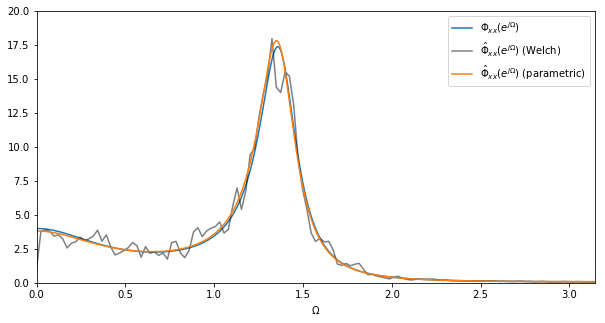

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.signal as sig


K = 4096  # length of random signal
N = 3  # order of AR model
a = np.array((1, -1, .5))  # coefficients of AR model

# generate random signal n[k]
np.random.seed(2)
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]
    
# estimate AR parameters by Yule-Walker method
rho, sigma = sm.regression.yule_walker(x, order=N, method='mle')

# compute true and estimated transfer function
Om, H = sig.freqz(1, np.insert(-a, 0, 1))
Om, He = sig.freqz(1, np.insert(-rho, 0, 1))
# compute PSD by Welch method
Om2, Pxx = sig.welch(x, return_onesided=True)

# plot PSDs
plt.figure(figsize=(10,5))
plt.plot(Om, np.abs(H)**2, label=r'$\Phi_{xx}(e^{j\Omega})$')
plt.plot(Om2*2*np.pi, .5*np.abs(Pxx), 'k-', alpha=.5 , label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Welch)')
plt.plot(Om, np.abs(He)**2, label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (parametric)')

plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 20])
plt.legend();

**Exercise**

* Change the order `N` of the AR model used for estimation by the Yule-Walker equations. What happens if the order is smaller or higher than the order of the true system? Why?

* Change the number of samples `K`. Is the estimator consistent?

Solution: Choosing the order of the estimated AR model differently from the true process results in a mismatch of the model with the consequence of potentially large deviations between the estimated PSD and true PSD. These deviations are typically larger when choosing the order smaller since the model does definitely not fit to the true process. However, choosing the order larger is typically not that problematic since some of the AR coefficients are estimated as approximately zero due to the lower order of the process generating the random signal. Increasing the number of samples seems to lower the bias and variance of the estimated PSD, the estimator can therefore be assumed to be consistent.


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2017*.